**МУРМАНСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ**

**Институт арктических технологий**

**Кафедра цифровых технологии, математики и экономики**

Компьютерное моделирование

**Лабораторная работа №2**

**Тема**: Моделирование гравитационного взаимодействия объектов

**Выполнил**: студент группы ИВТб18о-1, Корнилов Владислав Валерьевич

**Дата защиты**: 20.12.2021

**Задание**:

1. Смоделировать гравитационное взаимодействие двух точек, находящихся на Ox.
2. Смоделировать гравитационное взаимодействие для точек, расположенных случайным образом

In [308]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
class Vector2:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y

    def length(self):
        return math.sqrt(self.x ** 2 + self.y ** 2)

    def __add__(self, other):
        return Vector2(self.x + other.x, self.y + other.y)
    def __sub__(self, other):
        return Vector2(self.x - other.x, self.y - other.y)
    def __neg__(self):
        return Vector2(-self.x, -self.y)

    def __mul__(self, param):
        return Vector2(self.x * param, self.y * param)
    def __truediv__(self, param):
        return Vector2(self.x / param, self.y / param)

    def scalar(self, other):
        return self.x * other.x + self.y * other.y
    def cross(self, other):
        return self.x * other.y - self.y * other.x

    def normalize(self):
        return self / self.length()

    def rotate(self, angle):
        x1 = self.x * math.cos(angle) - self.y * math.sin(angle)
        y1 = self.y * math.cos(angle) + self.x * math.sin(angle)
        return Vector2(x1, y1)

    def getTuple(self):
        return (self.x, self.y)

In [310]:
class Point:
    size = 0 # размер круга
    color = ''
    mass = 0 # кг
    pos = Vector2(0, 0)
    vel = 0  # м/c
    velDir = Vector2(0, 0) # нормализованный вектор скорости (направления)
    collFrac = 0 # часть расстояния, пройденная до столкновения, для такого же перемещения при разлете

    def __init__(self, size = 10, mass = 100, color = '#aaaaaa', x = 0, y = 0):
        self.size = size
        self.color = color
        self.mass = mass
        self.pos = Vector2(x, y)
        self.vel = 0
        self.velDir = Vector2(0, 0)

    def getVel(self):
        return self.velDir * self.vel

In [326]:
class Data:
    border = Vector2(10, 10)
    fig = 0
    ax = 0
    line = 0
    scat = 0
    n = 0

    G = 1
    points = []

    fps = 30
    seconds = 6

In [312]:
def drawPoints(data):
    #arrx = [data.point1[0], data.point2[0]]
    #arry = [data.point1[1], data.point2[1]]
    #data.scat = data.ax.scatter(arrx, arry, s = data.size * data.size)
    coords = []
    for point in data.points:
        xy = (point.pos.x, point.pos.y)
        coords.append(xy)
    data.scat.set_offsets(coords)

In [313]:
def setupScatter(data):
    arrx = []
    arry = []
    sizes = []
    colors = []
    for point in data.points:
        arrx.append(point.pos.x)
        arry.append(point.pos.y)
        sizes.append(point.size ** 2)
        colors.append(point.color)
    return data.ax.scatter(x = arrx, y = arry, s = sizes, c = colors)
    

In [314]:
def setup2PointsField(data):
    data.fig, data.ax = plt.subplots(figsize=(data.border.x, data.border.y))
    #ax = plt.subplot(1,1,1)
    data.ax.set(xlim = (-data.border.x, data.border.x), ylim = (-data.border.y, data.border.y))
    
    data.line, = data.ax.plot([-data.border.x, data.border.x], [0, 0])

    distance = 1.5 * data.border.x
    data.scat = setupScatter(data)
    
    drawPoints(data)

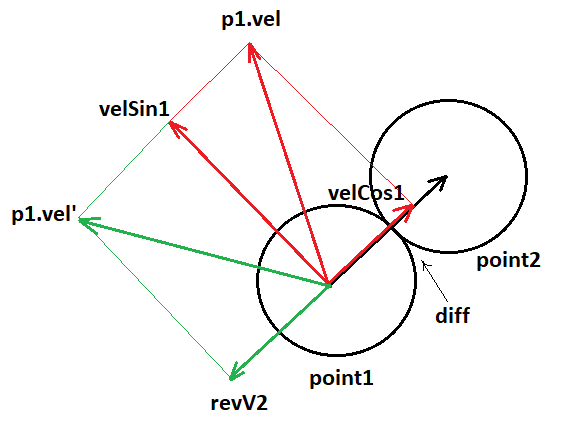

In [315]:
from IPython.display import Image
Image('calcCollision.png')

In [316]:
def calcCollision(point1, point2):
    diff = point2.pos - point1.pos

    sin1 = diff.cross(point1.velDir) / diff.length()
    cos1 = diff.scalar(point1.velDir) / diff.length()
    velSin1 = point1.vel * sin1
    velCos1 = point1.vel * cos1
    velSin1 = diff.rotate(math.radians(90)).normalize() * velSin1
    velCos1 = diff.normalize() * velCos1

    diff = -diff
    sin2 = diff.cross(point2.velDir) / diff.length()
    cos2 = diff.scalar(point2.velDir) / diff.length()
    velSin2 = point2.vel * sin2
    velCos2 = point2.vel * cos2
    velSin2 = diff.rotate(math.radians(90)).normalize() * velSin2
    velCos2 = diff.normalize() * velCos2

    m1, m2 = point1.mass, point2.mass

    revV1 = (velCos2 * 2 * m2 + velCos1 * (m1 - m2)) / (m1 + m2)
    revV2 = (velCos1 * 2 * m1 + velCos2 * (m2 - m1)) / (m1 + m2)

    point1.velDir = velSin1 + revV1
    point2.velDir = velSin2 + revV2
    point1.vel = point1.velDir.length()
    point1.velDir = point1.velDir.normalize()
    point2.vel = point2.velDir.length()
    point2.velDir = point2.velDir.normalize()

# point1 = Point()
# point1.vel = Vector2(2,3).length()
# point1.velDir = Vector2(2,3).normalize()
# point1.pos = Vector2(-1, -1)

# point2 = Point()
# point2.vel = 2
# point2.velDir = Vector2(-1, 0)
# point2.pos = Vector2(0, 0)
# calcCollision(point1, point2)

In [318]:
def calcPositions(data):
    dT = 1 / data.fps
    for point1 in data.points:
        F = Vector2()
        for point2 in data.points:
            if point1 == point2:
                continue

            diff = point2.pos - point1.pos
            distance = diff.length()
            if point1.velDir.length() == 0:
                point1.velDir = diff.normalize()
            if point2.velDir.length() == 0:
                point2.velDir = -diff.normalize()
            minDistance = point1.size / 2 + point2.size / 2
            minDistance /= 27.5
           
            if (distance < minDistance + 1e-6):
                print("v = ", point1.vel, point2.vel)
                calcCollision(point1, point2)
            else:
                F += diff.normalize() * data.G * point1.mass * point2.mass / (distance * distance)
        
        a = F / point1.mass
        vel = point1.getVel() + a * dT
        point1.velDir = vel.normalize()
        point1.vel = vel.length()
        if point1.vel < 0:
            point1.vel *= -1
            point1.velDir *= -1
        if point2.vel < 0:
            point2.vel *= -1
            point2.velDir *= -1
        d1 = point1.getVel() * dT + a * (dT**2) / 2
        nextPos1 = point1.pos + d1
        

In [319]:
def calcTwoPointsPositions(data):
    point1 = data.points[0]
    point2 = data.points[1]
    diff = point2.pos - point1.pos
    distance = diff.length()
    if point1.velDir.length() == 0:
        point1.velDir = diff.normalize()
    if point2.velDir.length() == 0:
        point2.velDir = -diff.normalize()

    minDistance = point1.size / 2 + point2.size / 2
    minDistance /= 27.5
    dT = 1 / data.fps
    F = 1e-10

    if (distance < minDistance + 1e-6):
        print("v = ", point1.vel, point2.vel)
        calcCollision(point1, point2)
    else:
        F = data.G * point1.mass * point2.mass / (distance * distance)
    
    a1 = diff.normalize() * (F / point1.mass)
    a2 = -diff.normalize() * (F / point2.mass)
    
    vel1 = point1.getVel() + a1 * dT
    vel2 = point2.getVel() + a2 * dT

    d1 = (point1.getVel() + vel1) * dT / 2
    d2 = (point2.getVel() + vel2) * dT / 2

    point1.velDir = vel1.normalize()
    point2.velDir = vel2.normalize()
    point1.vel = vel1.length()
    point2.vel = vel2.length()

    if point1.vel < 0:
        point1.vel *= -1
        point1.velDir *= -1
    if point2.vel < 0:
        point2.vel *= -1
        point2.velDir *= -1

    nextPos1 = point1.pos + d1
    nextPos2 = point2.pos + d2
    nextDiff = nextPos2 - nextPos1
    if nextDiff.x * diff.x < 0 or nextDiff.length() < minDistance:
        nextLength = math.copysign(nextDiff.length(), nextDiff.x * diff.x)
        curDiff = distance - nextLength
        needDiff = distance - minDistance

        fraction = 1
        if curDiff != 0:
            fraction = needDiff / curDiff
        

        point1.collFrac = point2.collFrac = fraction
        d1 *= fraction
        d2 *= fraction

    point1.pos += d1
    point2.pos += d2

    lastDiff = (point1.pos - point2.pos).length()

    data.points[0] = point1
    data.points[1] = point2


In [320]:
def drawframe(n, *fargs):
    data = fargs[0]
    data.n = n
    data.ax.set_title("frame = " + str(n))
    calcTwoPointsPositions(data)
    drawPoints(data)
    return data.scat,

In [321]:
def initAnim(data):
    from matplotlib import animation
    
    setup2PointsField(data)
    anim = animation.FuncAnimation(data.fig, drawframe, fargs=[data], frames = data.fps * data.seconds, interval = 1000 / data.fps, blit=True)

    return anim


In [322]:
import math
def escapeVelocity1(G, M, R):
    v = math.sqrt(G * M / R)
    return v

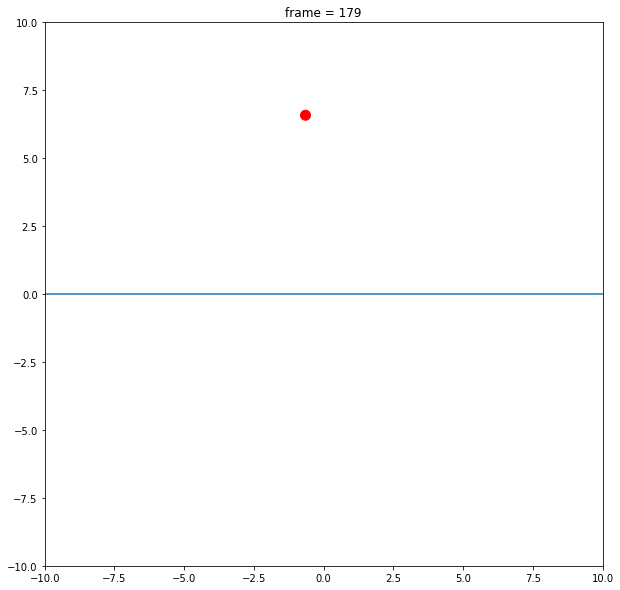

In [328]:
from matplotlib import rc
data = Data()
data.points = []
point1 = Point(x = 0, y = 0, size = 10, mass = 1000, color='#ff0000')
point2 = Point(x = 5)
point2.vel = 13
point2.velDir.y = 1
data.points.append(point1)
data.points.append(point2)
anim = initAnim(data)
rc('animation', html='jshtml')
anim